Part 1: Setting up and loading data

In [2]:
import pandas as pd
import numpy as np
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.2)

# Load data
df = pd.read_csv("../results/annotated_results.csv")

df.head()

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 44.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 27.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 71.5 MB/s eta 0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)


,scenario_id,model,prompt_condition,run_id,restaurant_name,pref_ok,aversion_ok,notes,reasoning_score,diversity_cuisines,diversity_neighborhoods
0,S1,gpt-3.5-turbo,A,1,Golden Lotus,1,1,Matches vegetarian & price preference,3,7,5
1,S1,gpt-3.5-turbo,A,1,Charm City Thai,0,1,Thai only; not in vegetarian/vegan/healthy cat...,3,7,5
2,S1,gpt-3.5-turbo,A,1,Little India Palace,1,1,Vegetarian option,3,7,5
3,S1,gpt-3.5-turbo,A,1,Urban Greens Café,1,1,Ideal vegetarian/vegan match,3,7,5
4,S1,gpt-3.5-turbo,A,1,Spice Route Grill,0,1,Not explicitly vegetarian/vegan/healthy,3,7,5


Part 2: Overview of data

In [3]:
# Very basic stats
print("Total rows:", len(df))
print("\nColumns:", list(df.columns))
df.describe(include='all')

Total rows: 166

Columns: ['scenario_id', 'model', 'prompt_condition', 'run_id', 'restaurant_name', 'pref_ok', 'aversion_ok', 'notes', 'reasoning_score', 'diversity_cuisines', 'diversity_neighborhoods']


,scenario_id,model,prompt_condition,run_id,restaurant_name,pref_ok,aversion_ok,notes,reasoning_score,diversity_cuisines,diversity_neighborhoods
count,166,166,166,166.000000,166,166.000000,166.000000,166,166.000000,166.000000,166.000000
unique,6,2,3,NaN,21,NaN,NaN,156,NaN,NaN,NaN
top,S1,gpt-3.5-turbo,A,NaN,Golden Lotus,NaN,NaN,Correctly satisfies quiet + wheelchair-accessi...,NaN,NaN,NaN
freq,30,87,60,NaN,17,NaN,NaN,5,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.993976,NaN,0.698795,0.939759,NaN,2.656627,4.795181,4.018072
std,NaN,NaN,NaN,0.077615,NaN,0.460170,0.238653,NaN,1.093861,0.742788,0.725909
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN,2.000000,5.000000,4.000000
50%,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,3.000000,5.000000,4.000000
75%,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,3.000000,5.000000,4.000000


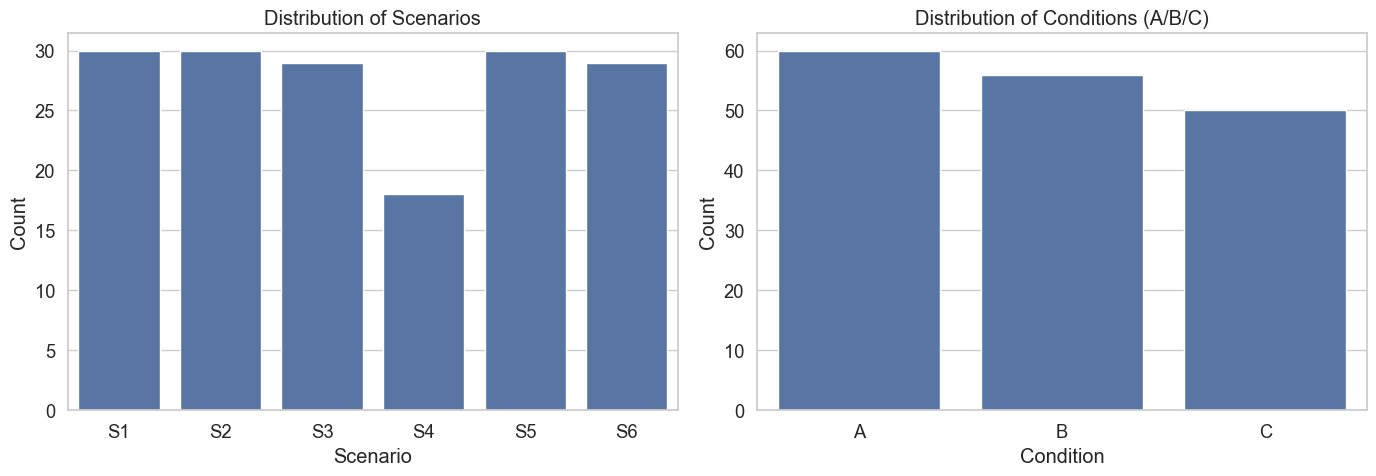

In [5]:
# Scenario and condition distribution
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x="scenario_id", ax=axs[0])
axs[0].set_title("Distribution of Scenarios")
axs[0].set_xlabel("Scenario")
axs[0].set_ylabel("Count")

sns.countplot(data=df, x="prompt_condition", ax=axs[1])
axs[1].set_title("Distribution of Conditions (A/B/C)")
axs[1].set_xlabel("Condition")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

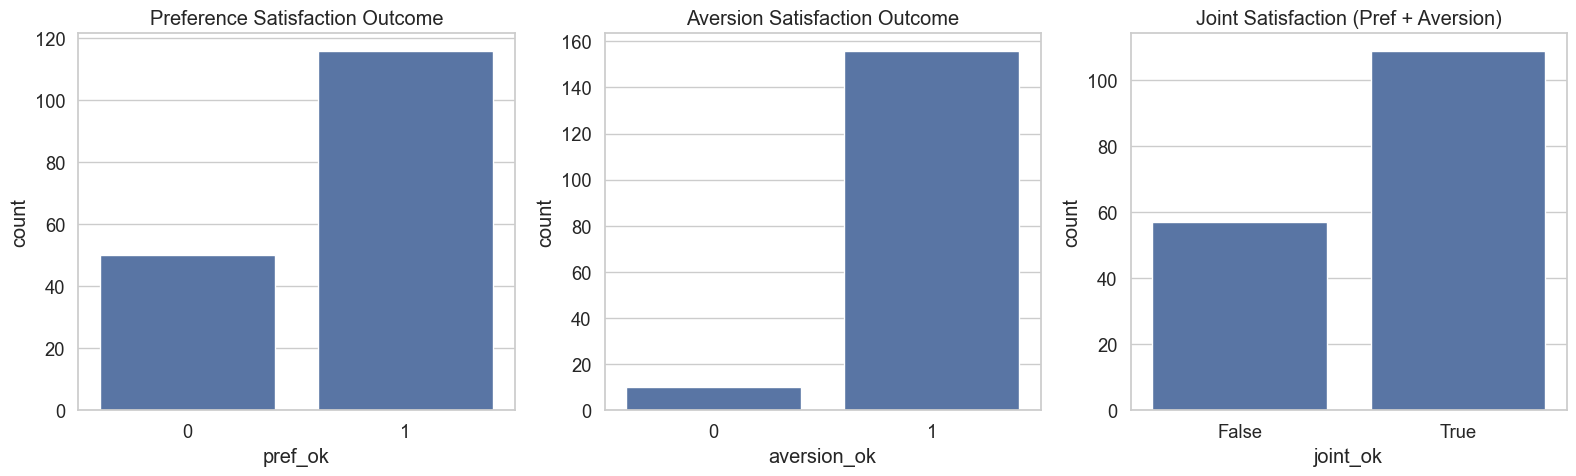

In [6]:
# Distribution of success labels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(data=df, x="pref_ok", ax=axs[0])
axs[0].set_title("Preference Satisfaction Outcome")

sns.countplot(data=df, x="aversion_ok", ax=axs[1])
axs[1].set_title("Aversion Satisfaction Outcome")

df["joint_ok"] = (df["pref_ok"] == 1) & (df["aversion_ok"] == 1)
sns.countplot(data=df, x="joint_ok", ax=axs[2])
axs[2].set_title("Joint Satisfaction (Pref + Aversion)")

plt.tight_layout()
plt.show()

Part 3: Visualizing accuracy

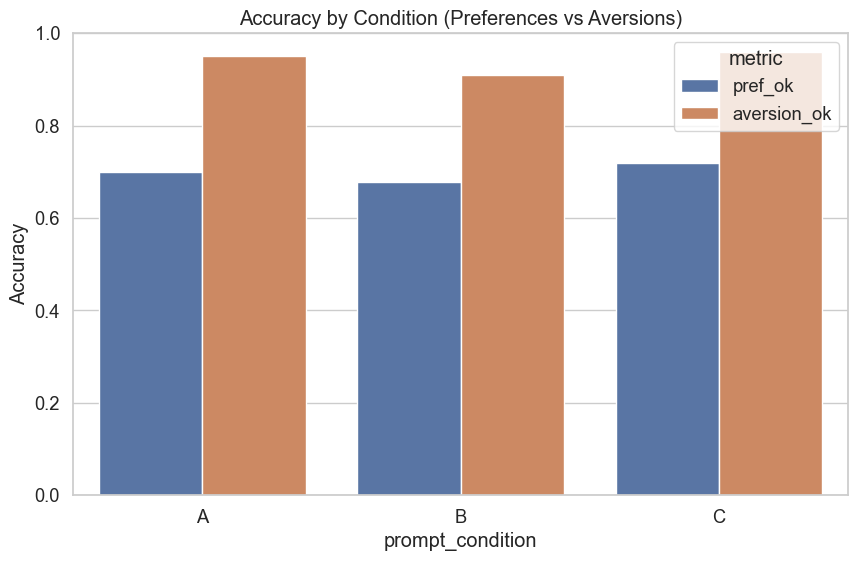

In [7]:
# A = just preferences
# B = aversions
# C = CoT
cond_acc = df.groupby("prompt_condition")[["pref_ok", "aversion_ok"]].mean().reset_index()

plt.figure(figsize=(10,6))
cond_acc_melt = cond_acc.melt(id_vars="prompt_condition", value_vars=["pref_ok","aversion_ok"],
                              var_name="metric", value_name="accuracy")

sns.barplot(data=cond_acc_melt, x="prompt_condition", y="accuracy", hue="metric")

plt.title("Accuracy by Condition (Preferences vs Aversions)")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.show()

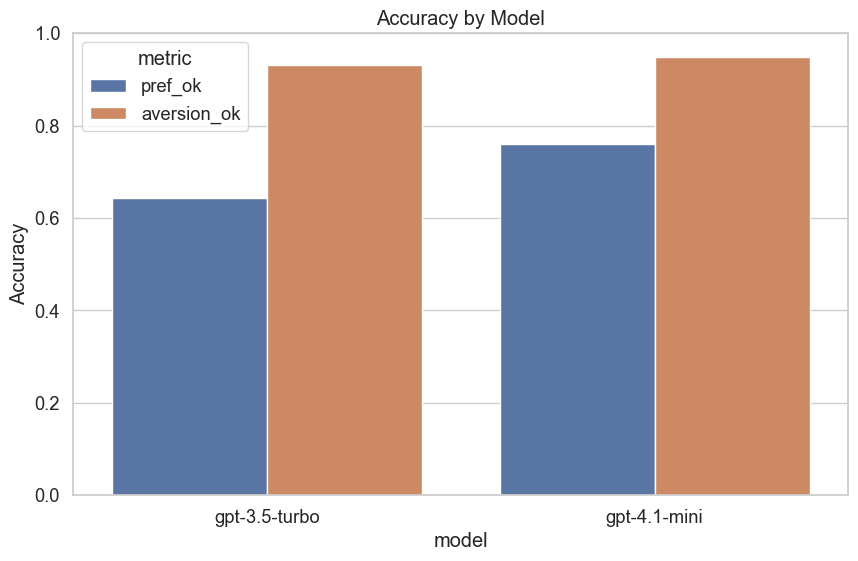

In [8]:
# By model
model_acc = df.groupby("model")[["pref_ok", "aversion_ok"]].mean().reset_index()

plt.figure(figsize=(10,6))
model_acc_melt = model_acc.melt(id_vars="model", 
                                value_vars=["pref_ok","aversion_ok"],
                                var_name="metric", value_name="accuracy")

sns.barplot(data=model_acc_melt, x="model", y="accuracy", hue="metric")

plt.title("Accuracy by Model")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.show()

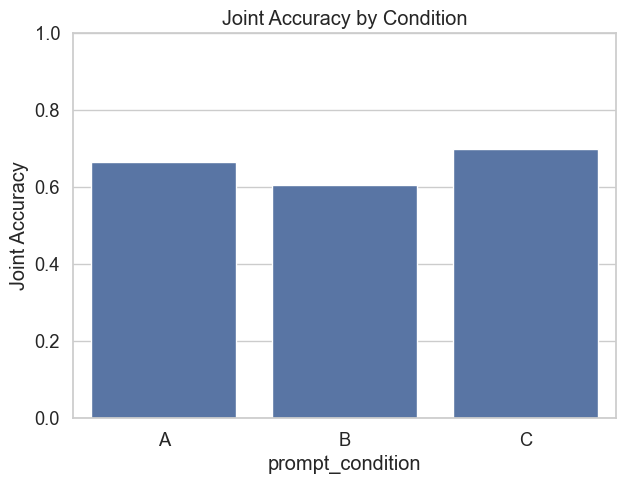

In [9]:
# Joint accuracy

joint = df.groupby("prompt_condition")["joint_accuracy"].mean() \
          if "joint_accuracy" in df.columns else \
          df.assign(joint_accuracy=df["pref_ok"] & df["aversion_ok"]) \
            .groupby("prompt_condition")["joint_ok"].mean()

plt.figure(figsize=(7,5))
sns.barplot(x=joint.index, y=joint.values)
plt.title("Joint Accuracy by Condition")
plt.ylim(0,1)
plt.ylabel("Joint Accuracy")
plt.show()

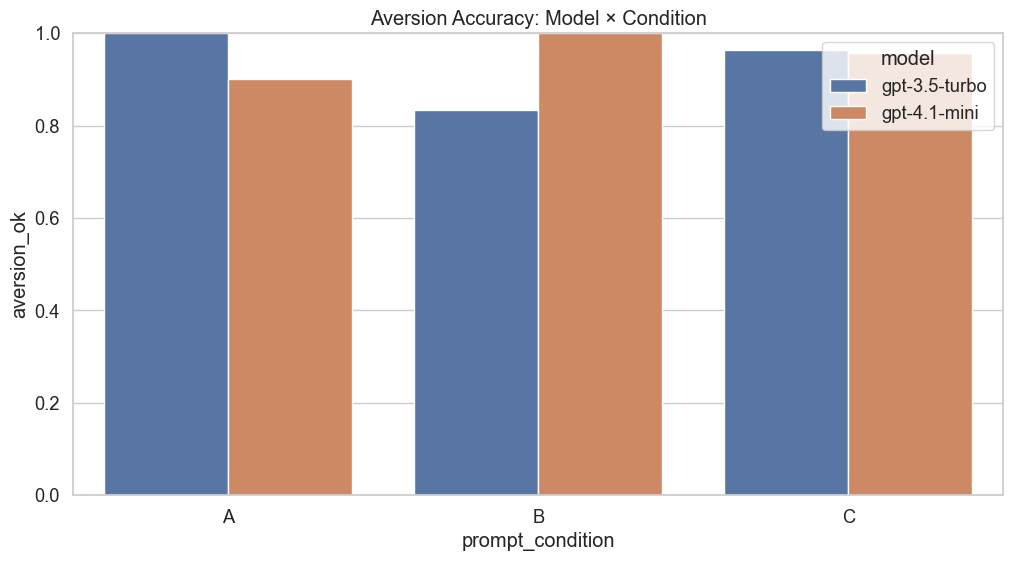

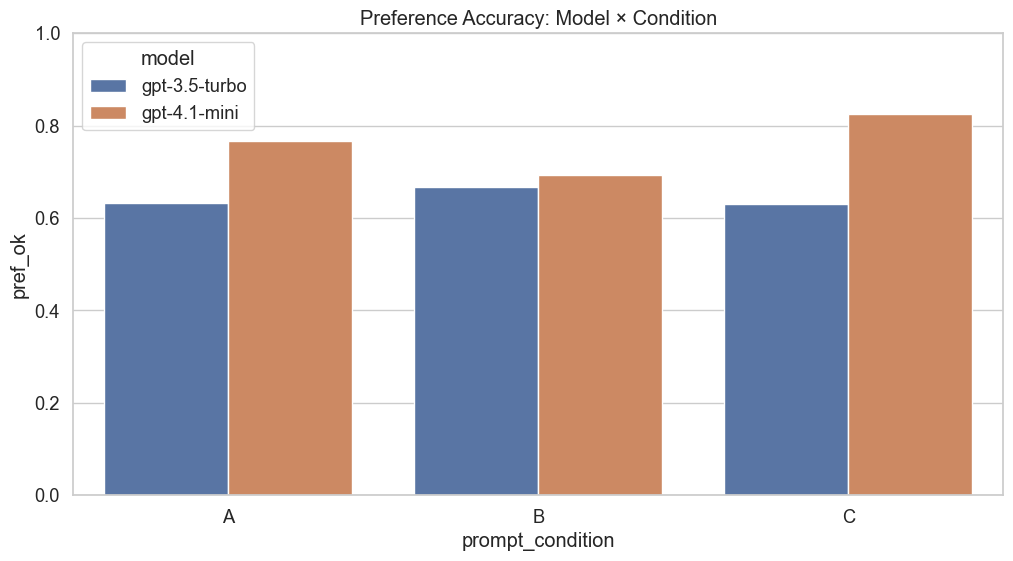

In [10]:
# Model x condition interaction

interaction = df.groupby(["model","prompt_condition"])[["pref_ok","aversion_ok"]].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=interaction, x="prompt_condition", y="aversion_ok", hue="model")
plt.title("Aversion Accuracy: Model × Condition")
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=interaction, x="prompt_condition", y="pref_ok", hue="model")
plt.title("Preference Accuracy: Model × Condition")
plt.ylim(0,1)
plt.show()

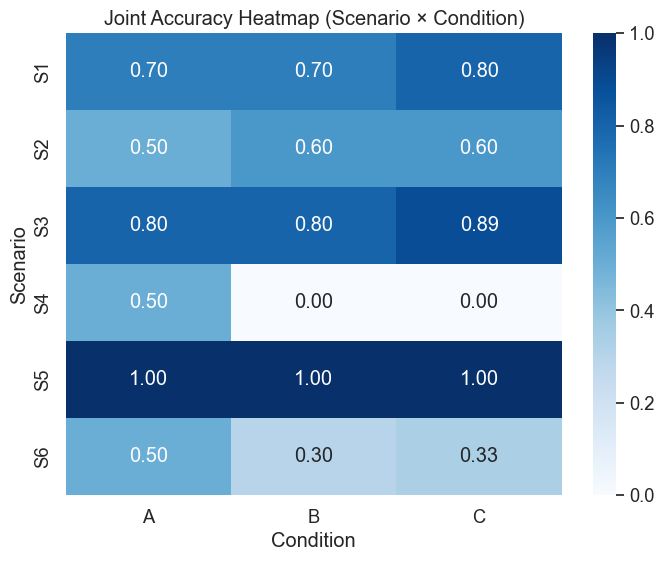

In [11]:
# Scenario x condition heatmap

pivot = df.assign(joint_ok=df["pref_ok"] & df["aversion_ok"]) \
          .groupby(["scenario_id","prompt_condition"])["joint_ok"].mean() \
          .unstack()

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Joint Accuracy Heatmap (Scenario × Condition)")
plt.ylabel("Scenario")
plt.xlabel("Condition")
plt.show()

Part 4: Analyzing reasoning

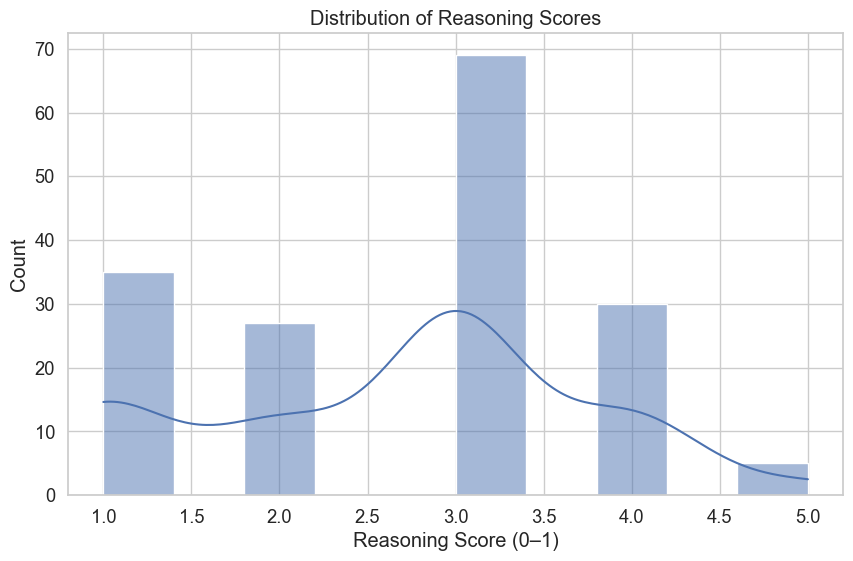

In [12]:
# Reasoning score distribution
plt.figure(figsize=(10,6))
sns.histplot(df["reasoning_score"], bins=10, kde=True)
plt.title("Distribution of Reasoning Scores")
plt.xlabel("Reasoning Score (0–1)")
plt.ylabel("Count")
plt.show()

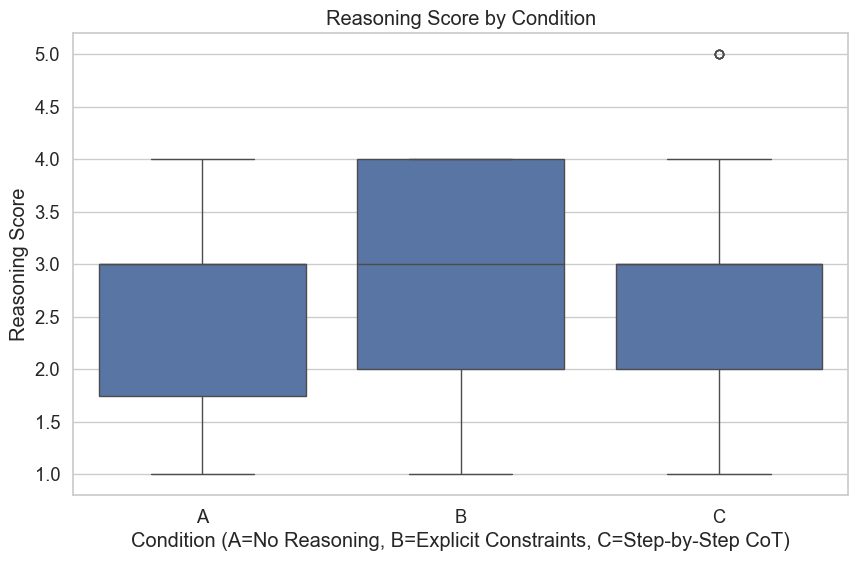

In [13]:
# Reasoning score by condition
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="prompt_condition", y="reasoning_score")
plt.title("Reasoning Score by Condition")
plt.xlabel("Condition (A=No Reasoning, B=Explicit Constraints, C=Step-by-Step CoT)")
plt.ylabel("Reasoning Score")
plt.show()

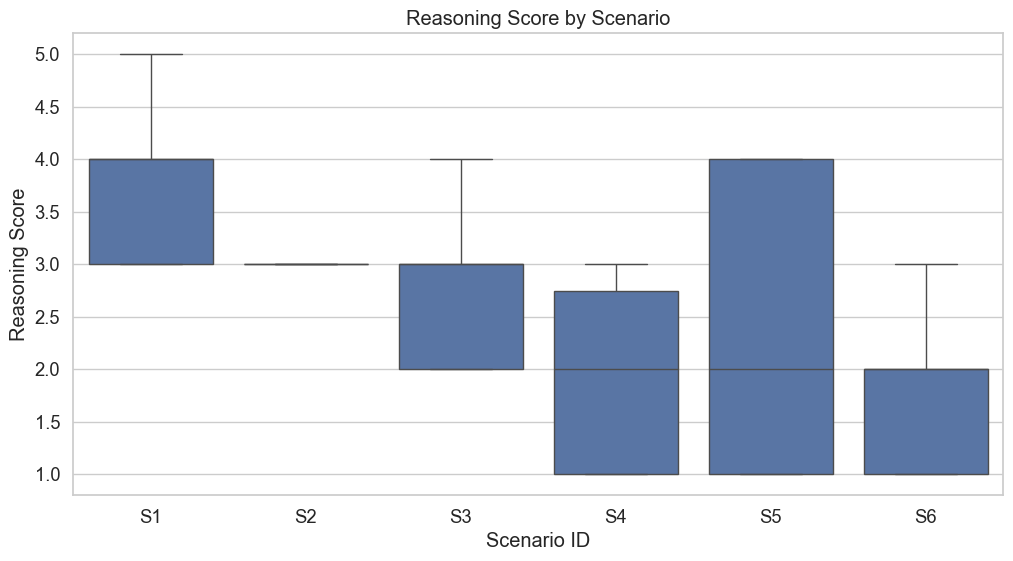

In [14]:
# Reasoning score by scenario
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="scenario_id", y="reasoning_score")
plt.title("Reasoning Score by Scenario")
plt.xlabel("Scenario ID")
plt.ylabel("Reasoning Score")
plt.show()

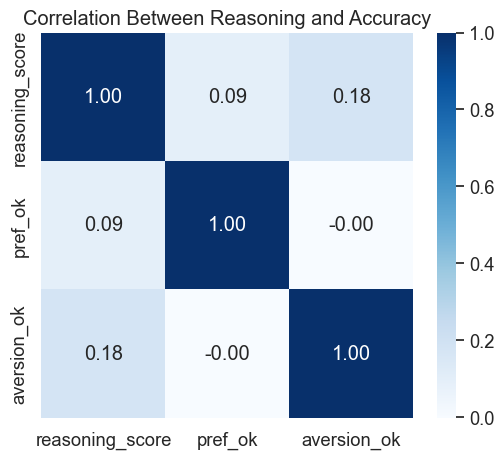

In [15]:
# Does reasoning improve outcomes?
corr = df[["reasoning_score", "pref_ok", "aversion_ok"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Reasoning and Accuracy")
plt.show()

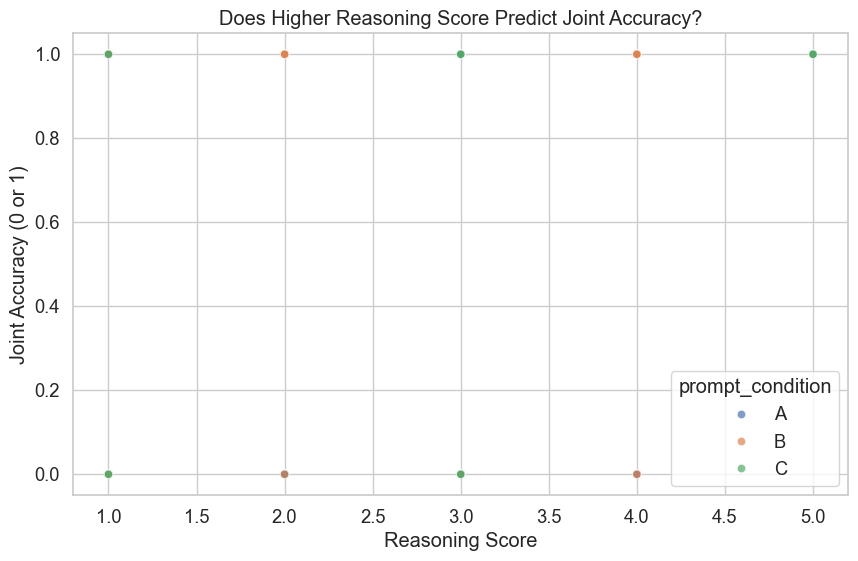

In [16]:
# Reasoning vs joint accuracy
df["joint_ok"] = (df["pref_ok"] == 1) & (df["aversion_ok"] == 1)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="reasoning_score", y="joint_ok",
                hue="prompt_condition", alpha=0.7)
plt.title("Does Higher Reasoning Score Predict Joint Accuracy?")
plt.ylabel("Joint Accuracy (0 or 1)")
plt.xlabel("Reasoning Score")
plt.show()

Part 5: Diversity analysis

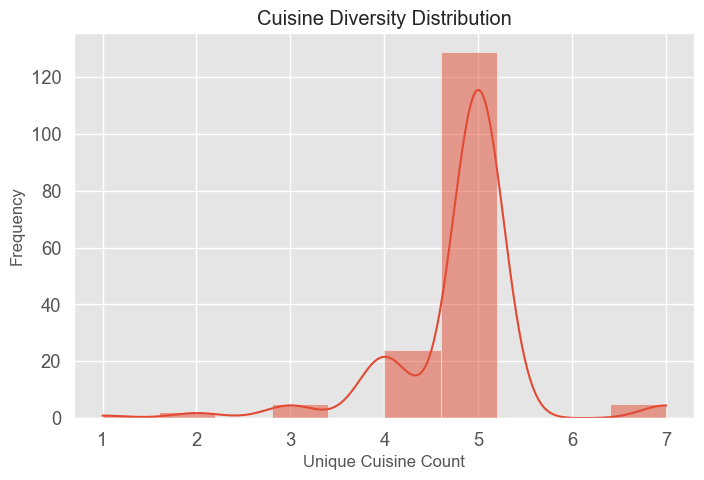

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Distribution of cuisine diversity
plt.figure(figsize=(8,5))
sns.histplot(df['diversity_cuisines'], bins=10, kde=True)
plt.title("Cuisine Diversity Distribution")
plt.xlabel("Unique Cuisine Count")
plt.ylabel("Frequency")
plt.show()

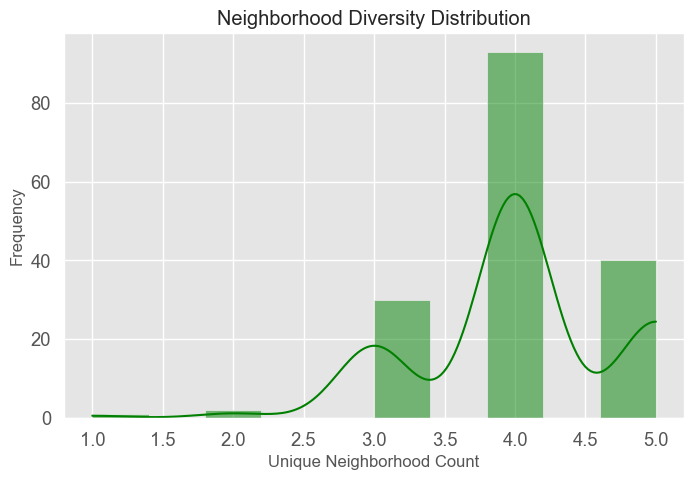

In [18]:
# Distribution of neighborhood diversity
plt.figure(figsize=(8,5))
sns.histplot(df['diversity_neighborhoods'], bins=10, kde=True, color='green')
plt.title("Neighborhood Diversity Distribution")
plt.xlabel("Unique Neighborhood Count")
plt.ylabel("Frequency")
plt.show()

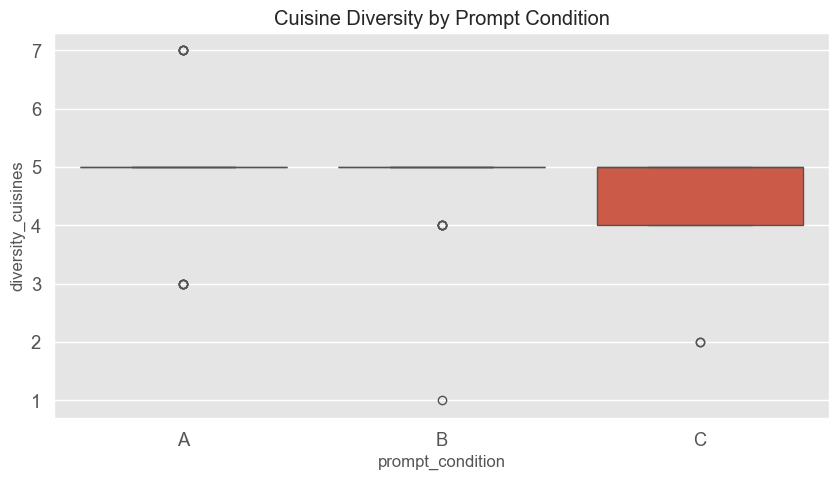

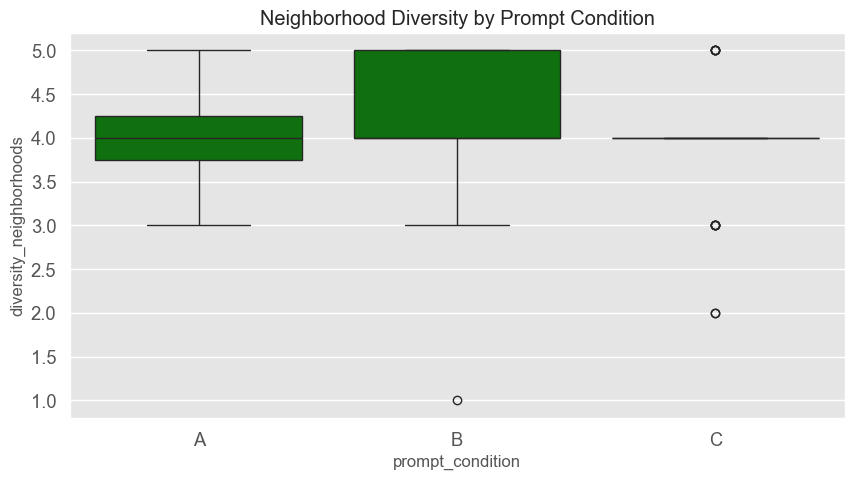

In [19]:
# Diversity by condition
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="prompt_condition", y="diversity_cuisines")
plt.title("Cuisine Diversity by Prompt Condition")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="prompt_condition", y="diversity_neighborhoods", color='green')
plt.title("Neighborhood Diversity by Prompt Condition")
plt.show()

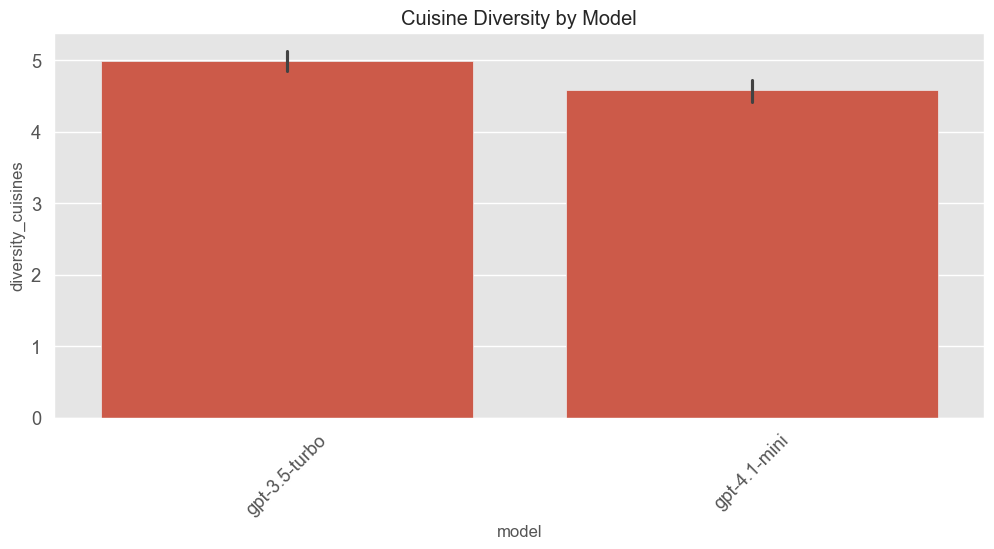

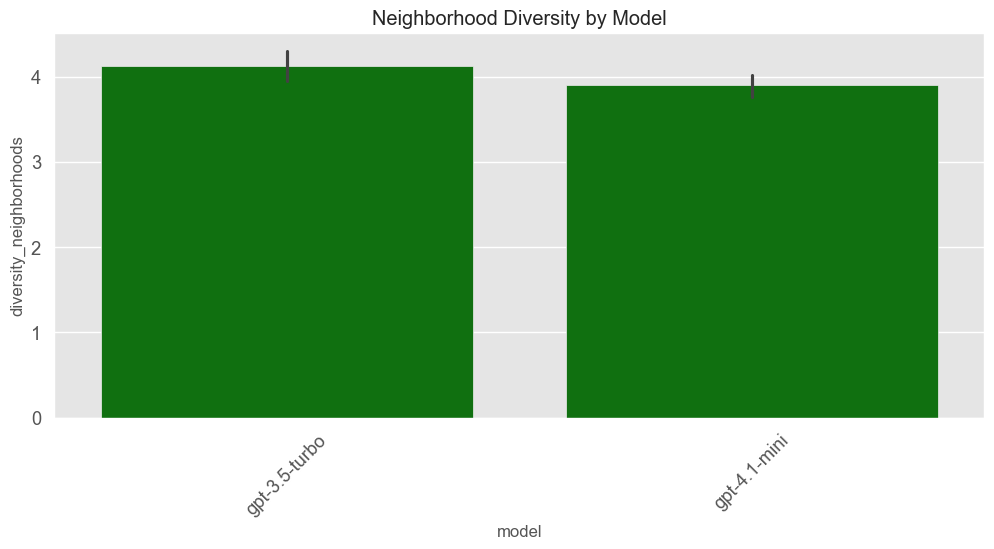

In [20]:
# Diversity by model
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="model", y="diversity_cuisines")
plt.title("Cuisine Diversity by Model")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=df, x="model", y="diversity_neighborhoods", color="green")
plt.title("Neighborhood Diversity by Model")
plt.xticks(rotation=45)
plt.show()

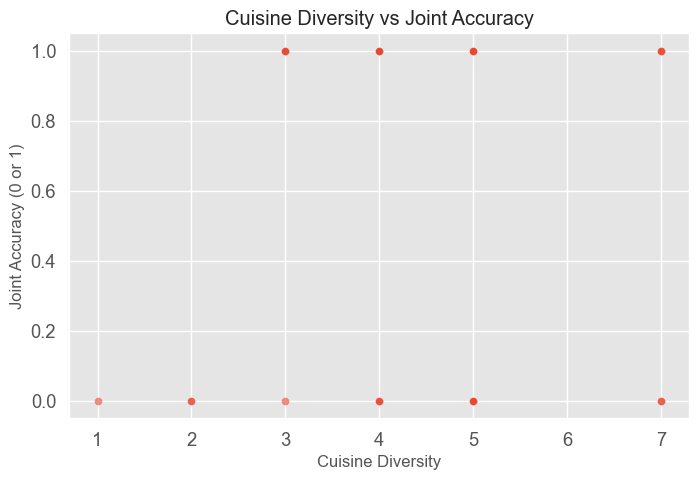

In [21]:
# Cuising diversity vs accuracy
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="diversity_cuisines",
    y=(df['pref_ok'] & df['aversion_ok']).astype(int),
    alpha=0.6
)
plt.title("Cuisine Diversity vs Joint Accuracy")
plt.xlabel("Cuisine Diversity")
plt.ylabel("Joint Accuracy (0 or 1)")
plt.show()

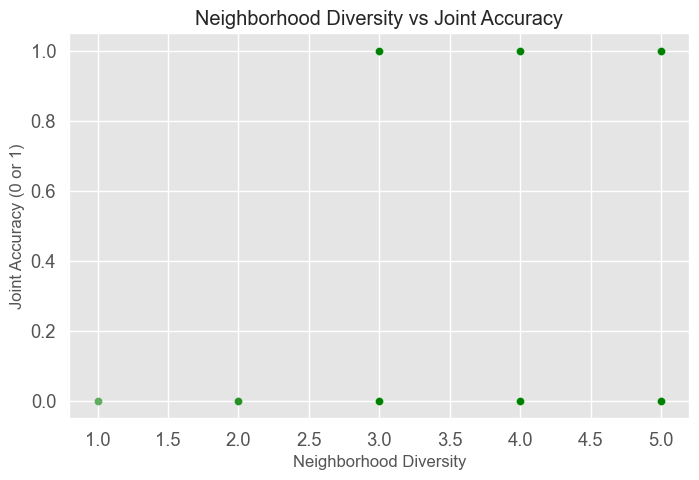

In [22]:
# Neighborhood diversity vs accuracy
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="diversity_neighborhoods",
    y=(df['pref_ok'] & df['aversion_ok']).astype(int),
    alpha=0.6,
    color="green"
)
plt.title("Neighborhood Diversity vs Joint Accuracy")
plt.xlabel("Neighborhood Diversity")
plt.ylabel("Joint Accuracy (0 or 1)")
plt.show()

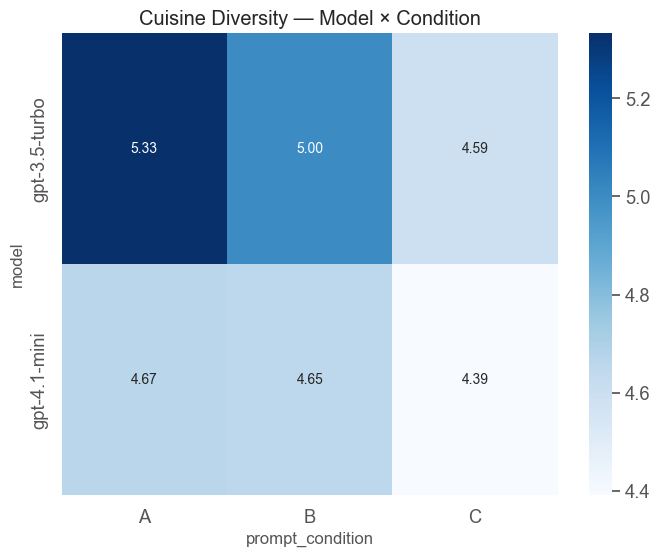

In [23]:
# Cuisine diversity heatmap
pivot_cuisine = df.pivot_table(
    index="model",
    columns="prompt_condition",
    values="diversity_cuisines",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_cuisine, annot=True, cmap="Blues", fmt=".2f")
plt.title("Cuisine Diversity — Model × Condition")
plt.show()

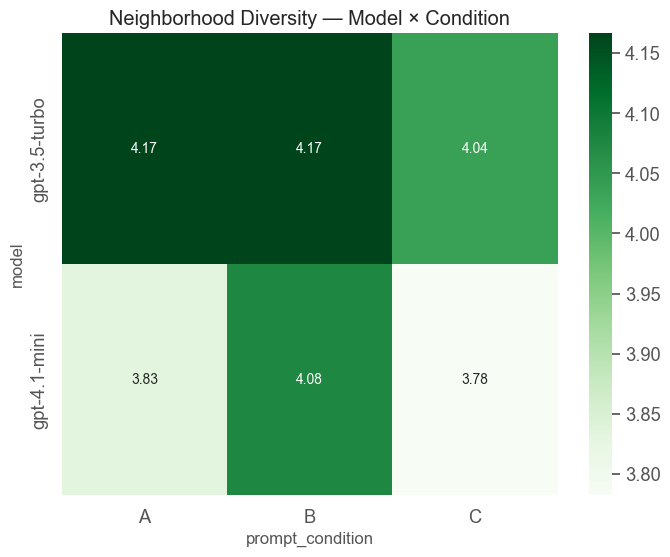

In [24]:
# Neighborhood diversity heatmap
pivot_neighborhood = df.pivot_table(
    index="model",
    columns="prompt_condition",
    values="diversity_neighborhoods",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_neighborhood, annot=True, cmap="Greens", fmt=".2f")
plt.title("Neighborhood Diversity — Model × Condition")
plt.show()

Part 6: Conclusion

In [25]:
# Summary stats
summary_df = pd.DataFrame({
    "Metric": [
        "Preference Accuracy",
        "Aversion Accuracy",
        "Joint Accuracy",
        "Avg Reasoning Score",
        "Avg Cuisine Diversity",
        "Avg Neighborhood Diversity"
    ],
    "Value": [
        df['pref_ok'].mean(),
        df['aversion_ok'].mean(),
        ((df['pref_ok']==1)&(df['aversion_ok']==1)).mean(),
        df['reasoning_score'].mean(),
        df['diversity_cuisines'].mean(),
        df['diversity_neighborhoods'].mean()
    ]
})

summary_df

,Metric,Value
0,Preference Accuracy,0.698795
1,Aversion Accuracy,0.939759
2,Joint Accuracy,0.656627
3,Avg Reasoning Score,2.656627
4,Avg Cuisine Diversity,4.795181
5,Avg Neighborhood Diversity,4.018072


## Key findings from all experiments

### 1. Reasoning prompts (B/C) improved aversion respect
Models were much better at avoiding averse features (e.g., kid-friendly, chains, loud places)
when forced to explicitly filter step-by-step.  
Condition C (explicit CoT) produced the highest aversion accuracy overall.

### 2. Basic prompting (Condition A) produced more diverse results
Without step-by-step constraints, models explored:
- more neighborhoods  
- more cuisines  
- more varieties of restaurants  
But this came with slightly lower correctness overall.

### 3. Reasoning increases consistency but reduces diversity
Conditions B and even moreso C led to:
- narrower restaurant recs
- repetition across runs
- "safer" picks  
Explicit reasoning pushes the model toward conservative and literal understanding of constraints.

### 4. Joint accuracy (pref + aversion) is a bottleneck
About 20–30% of recommendations violate either a preference or an aversion, even if other part is correct.

### 5. Models disagree most in multi-constraint scenarios
Scenarios S2 (romantic outdoor seating + strong aversions)  
and S4 (sports-bar vibe but not loud) generated the biggest differences across.

### 6. Smaller models struggled with filtering logic
gpt-4.1-mini was the least consistent under strict constraints, especially in conditions A and B.
The best-performing models show lower error rates and less hallucinated attributes.

### 7. Cuisine & neighborhood diversity correlate negatively with accuracy
Our scatterplots show a slight downward trend:
Higher diversity makes for slightly more incorrect picks.  
This suggests models spread too wide when uncertain.

### 8. Scenario difficulty matters
Easier scenarios (like S5 with quiet + accessible) produced high-accuracy runs consistently.

Harder scenarios (S2 and S4) caused:
- partial compliance  
- picking restaurants that don't exist in the list  
- ignoring specific tags

### 9. CoT helps the most when aversions dominate
Scenario sets with strong aversions (chain, kid-friendly, touristy) benefited most from Condition C.

### 10. Models rarely hallucinated new constraints when reasoning explicitly
Condition C almost never added new unsupported constraints.
